In [2]:
# https://twitter.com/aigonewrong/status/1320605318691262464

#### compute price return using $ticker

+ verify daily percent return mean is 0

+ check how mean return varies as period is increased from day 1 to 120.

+ verify log return matches well with percent return

+ check distribution of 30-day percent change 

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get historical daily price for $ticker
symbol = 'SPY'
tick = yf.Ticker(symbol)
history = tick.history(period="max")

### + verify daily percent return mean is 0

In [3]:
changes = history.Close.pct_change(1).dropna().values
print(np.mean(changes))

0.00044109449579917293


### + check how mean return varies as period is increased from day 1 to 120.

,period,mymean,mystd
0,1,0.000441,0.011911
1,10,0.004220,0.032208
2,20,0.008431,0.044869
3,30,0.012548,0.053841
4,40,0.016730,0.061383
5,50,0.020934,0.068259
6,60,0.025113,0.074266
7,70,0.029291,0.079890
8,80,0.033502,0.085597
9,90,0.037679,0.091094


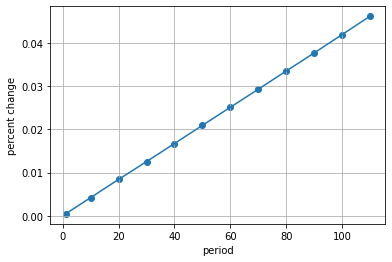

In [4]:
mylist = []
for period in np.arange(0,120,10):
    period = 1 if period == 0 else period
    changes = history.Close.pct_change(period).dropna().values
    item=dict(period=period,mymean=np.mean(changes),mystd=np.std(changes))
    mylist.append(item)
df = pd.DataFrame(mylist)

plt.plot(df.period,df.mymean)
plt.scatter(df.period,df.mymean)
plt.grid(True)
plt.xlabel('period')
plt.ylabel('percent change')

df

#### When selling puts & calls 45 DTE, historically, better to be a bit far out on the call side given SPY mean change over 30 to 50 days range from 1 to 2%

### + verify log return matches well with percent return

In [5]:
# log return computation
changes = history.Close.pct_change(1).dropna().values
df=pd.DataFrame()
df['price'] = history.Close
df['pct_chg'] = df.price.pct_change()
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))

pearsons correlation coefficient 0.9997553788316791


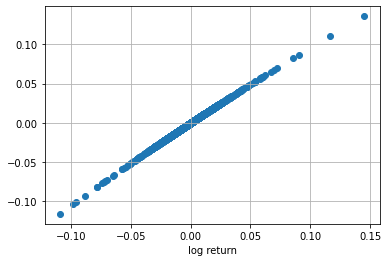

In [6]:
# percent change, veresus log return
plt.scatter(df.iloc[1:].pct_chg,df.iloc[1:].log_ret)
corrcoef = np.corrcoef(df.iloc[1:].pct_chg,df.iloc[1:].log_ret) # 2x2 matrix
print('pearsons correlation coefficient',corrcoef[0][1])
plt.xlabel('percent change')
plt.xlabel('log return')
plt.grid(True)

### + check distribution of 1-day percent change 

mean 0.00044 std 0.01191
median 0.00068
float64 float64
1993-01-29 00:00:00 2020-10-23 00:00:00


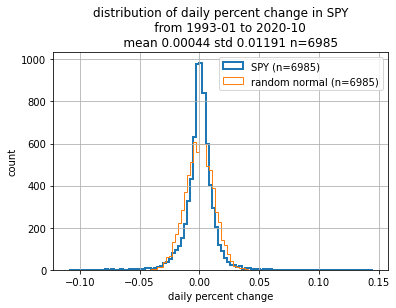

In [7]:
subhistory = history.copy()
changes = subhistory.Close.pct_change(1).dropna().values
mu,sigma,size,me = np.mean(changes), np.std(changes), len(changes),np.median(changes)
myrange = (np.min(changes),np.max(changes))

print(f'mean {mu:1.5f} std {sigma:1.5f}')
print(f'median {me:1.5f}')

rand_normal=np.random.normal(loc=0,scale=sigma,size=size)
print(rand_normal.dtype,changes.dtype)

_=plt.hist(changes,range=myrange,bins=100,histtype='step',linewidth=2,label=f'SPY (n={size})')
_=plt.hist(rand_normal,range=myrange,bins=100,histtype='step',linewidth=1,label=f'random normal (n={size})',)
plt.xlabel('daily percent change')
plt.ylabel('count')
plt.title(f'''distribution of daily percent change in {symbol}\n \
    from {np.min(subhistory.index).strftime("%Y-%m")} to {np.max(subhistory.index).strftime("%Y-%m")}\n \
    mean {mu:1.5f} std {sigma:1.5f} n={size}'''
 )
plt.grid(True)
print(np.min(subhistory.index),np.max(subhistory.index))
plt.legend()


### + check distribution of 30-day percent change 

mean 0.01255 std 0.05384
median 0.01803
float64 float64
1993-01-29 00:00:00 2020-10-23 00:00:00


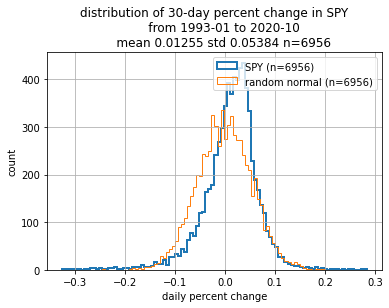

In [8]:
subhistory = history.copy()
changes = subhistory.Close.pct_change(30).dropna().values
mu,sigma,size,me = np.mean(changes), np.std(changes), len(changes),np.median(changes)
myrange = (np.min(changes),np.max(changes))

print(f'mean {mu:1.5f} std {sigma:1.5f}')
print(f'median {me:1.5f}')

rand_normal=np.random.normal(loc=0,scale=sigma,size=size)
print(rand_normal.dtype,changes.dtype)

_=plt.hist(changes,range=myrange,bins=100,histtype='step',linewidth=2,label=f'SPY (n={size})')
_=plt.hist(rand_normal,range=myrange,bins=100,histtype='step',linewidth=1,label=f'random normal (n={size})',)
plt.xlabel('daily percent change')
plt.ylabel('count')
plt.title(f'''distribution of 30-day percent change in {symbol}\n \
    from {np.min(subhistory.index).strftime("%Y-%m")} to {np.max(subhistory.index).strftime("%Y-%m")}\n \
    mean {mu:1.5f} std {sigma:1.5f} n={size}'''
 )
plt.grid(True)
print(np.min(subhistory.index),np.max(subhistory.index))
plt.legend()

Text(0.5, 1.0, 'SPY for past 200 days with past 150 days in "orange"')

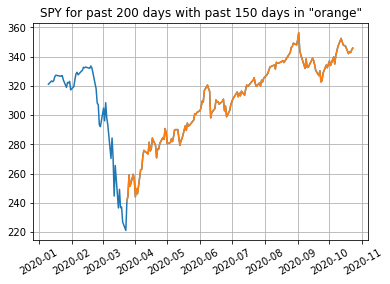

In [9]:
plt.plot(history.iloc[-200:].Close)
plt.plot(history.iloc[-150:].Close) # past 150 days
plt.xticks(rotation=30)
plt.grid(True)
plt.title(f'{symbol} for past 200 days with past 150 days in "orange"')

mean 0.059711222089598025 sd 0.04669181585367756
2020-03-24 00:00:00 2020-10-23 00:00:00


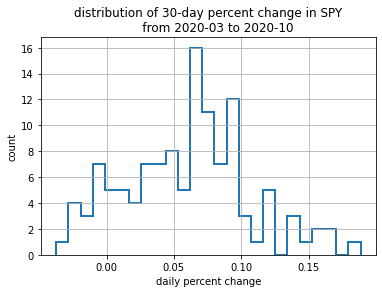

In [10]:
subhistory = history.copy().iloc[-150:]
changes = subhistory.Close.pct_change(30).dropna().values
print('mean',np.mean(changes),'sd',np.std(changes))
_=plt.hist(changes,bins=25,histtype='step',linewidth=2)
plt.xlabel('daily percent change')
plt.ylabel('count')
plt.title(f'''distribution of 30-day percent change in {symbol}\n \
    from {np.min(subhistory.index).strftime("%Y-%m")} to {np.max(subhistory.index).strftime("%Y-%m")}'''
 )
plt.grid(True)
print(np.min(subhistory.index),np.max(subhistory.index))

### ^^^  super positive skew from Mar to Oct 2020.  Already obvious from price plot.

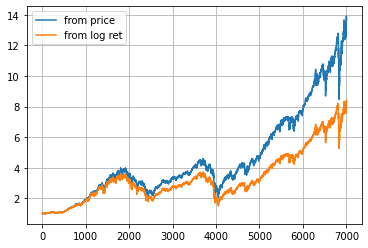

In [4]:
#
# refresher on log returns vs actual returns
#
# https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/
# https://quant.stackexchange.com/questions/21092/calculating-log-returns-across-multiple-securities-and-time

# get historical daily price for $ticker
symbol = 'SPY'
tick = yf.Ticker(symbol)
history = tick.history(period="max")

# log return computation
changes = history.Close.pct_change(1).dropna().values
df=pd.DataFrame()
df['price'] = history.Close
df['pct_chg'] = df.price.pct_change()
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))

norm_price_from_log_ret = np.expand_dims(np.cumprod(df.log_ret+1),axis=1)
norm_price_from_price = np.expand_dims(df.price.values/df.price.values[0],axis=1)
plt.plot(norm_price_from_price,label='from price')
plt.plot(norm_price_from_log_ret,label='from log ret')
plt.grid(True)
plt.legend()